<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Get-the-data-&amp;-Update" data-toc-modified-id="Get-the-data-&amp;-Update-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data &amp; Update</a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Manipulation</a></span></li><li><span><a href="#Visualization-all-Boulogne" data-toc-modified-id="Visualization-all-Boulogne-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualization all Boulogne</a></span></li><li><span><a href="#Visualization-around-Place-des-Passages" data-toc-modified-id="Visualization-around-Place-des-Passages-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Visualization around Place des Passages</a></span></li><li><span><a href="#Visualization-around-Place-des-Passages" data-toc-modified-id="Visualization-around-Place-des-Passages-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visualization around Place des Passages</a></span></li></ul></div>

Price study for Boulevard Jean Jaurès - Place des Passages

# Librairies

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
sns.set()

import json
from string import ascii_uppercase
import itertools
import requests as r
from scipy import stats

from PIL import Image
from IPython.display import display

import datetime

# Goal

Indentify average Price/sqm (Carrez & Bati) for all areas in Boulogne and specifically arounf my flat

# Get the data & Update

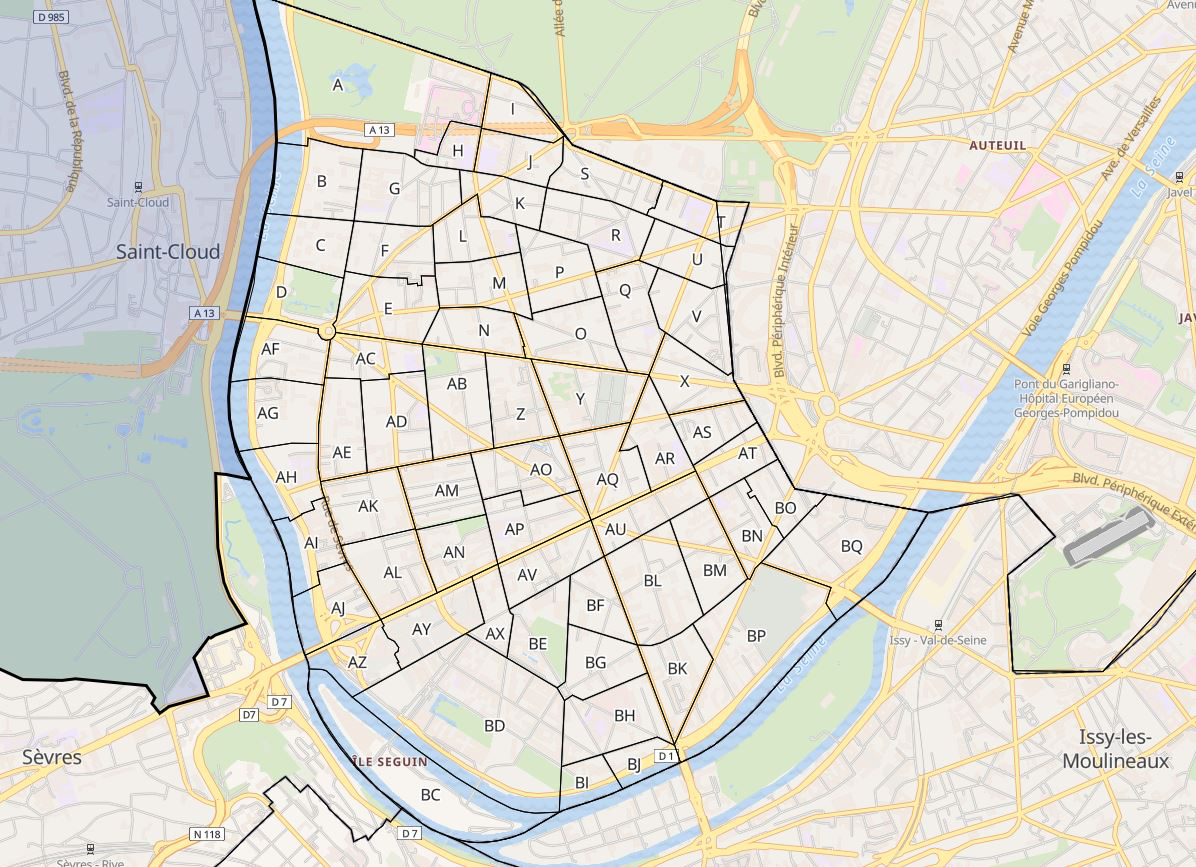

In [2]:
path="../HousingPriceStudy_BB/figures/Numéro Sections Cadastrales.jpg"
display(Image.open(path))

In [3]:
# function to genere URL for all (fr AA to BQ) for the commune 75109 - Paris 9e
# Not applicable to Boulogne
lst=[]
def iter_all_strings():
    for size in itertools.count(1):
        for s in itertools.product(ascii_uppercase, repeat=size):
            yield "".join(s)
for s in iter_all_strings():
    if len(s)<2:
        pass
    else:
        lst.append(s)
    if s == 'BQ':
        break
print(lst)

['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ']


In [4]:
lst_all=['0A','0B','0C','0D','0E','0F','0G','0H','0I','0J','0K','0L','0M','0N','0O','0P','0Q','0R','0S','0T','0U','0V','0X','0Y','0Z',
        'AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR','AS','AR','AT','AU','AV','AX','AY','AZ',
        'BC','BD','BE','BF','BG','BH','BI','BJ','BK','BL','BM','BN','BO','BP','BQ']

In [5]:
# loop to import all section from the commune 92012 - Paris 9e
lst_df=[]
for i in lst_all:
    data=r.get(f'https://app.dvf.etalab.gouv.fr/api/mutations3/92012/000{i}')
    data=data.json()
    df = pd.DataFrame(data['mutations'])
    lst_df.append(df) 
db=pd.concat(lst_df, axis=0, ignore_index=True)

In [6]:
#export command to get the CSV file for Flats transaction (BATI_not_outliers)
db.to_csv('../HousingPriceStudy_BB/data/Mutations_Boulogne.csv', sep='/', index=False)

In [7]:
db.head()

id_mutation date_mutation numero_disposition nature_mutation  \
0   2020-329253    2020-02-19                  1           Vente   
1  2019-1209970    2019-12-19                  1           Vente   
2  2019-1209663    2019-12-13                  1           Vente   
3  2019-1209545    2019-12-12                  1           Vente   
4  2019-1209545    2019-12-12                  1           Vente   

  valeur_fonciere adresse_numero adresse_suffixe   adresse_nom_voie  \
0         27000.0              5            None    VLA ALEXANDRINE   
1         24000.0              5            None    VLA ALEXANDRINE   
2        288000.0              4               B  BD ANATOLE FRANCE   
3         52500.0              5            None    VLA ALEXANDRINE   
4         52500.0              5            None    VLA ALEXANDRINE   

  adresse_code_voie code_postal  ... surface_reelle_bati  \
0              0061       92100  ...                 nan   
1              0061       92100  ...                 nan   
2              0110       92100  ...                29.0   
3              0061       92100  ...                 nan   
4              0061       92100  ...                 nan   

  nombre_pieces_principales code_nature_culture nature_culture  \
0                       0.0                None           None   
1                       0.0                None           None   
2                       1.0                None           None   
3                       0.0                None           None   
4                       0.0                None           None   

  code_nature_culture_speciale nature_culture_speciale surface_terrain  \
0                         None                    None             nan   
1                         None                    None             nan   
2                         None                    None             nan   
3                         None                    None             nan   
4                         None                    None             nan   

  longitude latitude section_prefixe  
0      None     None           0000A  
1      None     None           0000A  
2      None     None           0000A  
3      None     None           0000A  
4      None     None           0000A  

[5 rows x 41 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id_mutation                   680 non-null    object
 1   date_mutation                 680 non-null    object
 2   numero_disposition            680 non-null    object
 3   nature_mutation               680 non-null    object
 4   valeur_fonciere               680 non-null    object
 5   adresse_numero                680 non-null    object
 6   adresse_suffixe               680 non-null    object
 7   adresse_nom_voie              680 non-null    object
 8   adresse_code_voie             680 non-null    object
 9   code_postal                   680 non-null    object
 10  code_commune                  680 non-null    object
 11  nom_commune                   680 non-null    object
 12  code_departement              680 non-null    object
 13  ancien_code_commune 

# Data Manipulation 

In [9]:
#check type_local
db['type_local'].unique()

array(['Dépendance', 'Appartement',
       'Local industriel. commercial ou assimilé', 'None', 'Maison'],
      dtype=object)

In [10]:
#check Type de mutation / transaction
db['nature_mutation'].unique()

array(['Vente', 'Adjudication', "Vente en l'état futur d'achèvement",
       'Echange', 'Vente terrain à bâtir'], dtype=object)

In [11]:
#update date_mutation format
db['date_mutation'] = pd.to_datetime(pd.Series(db['date_mutation']))

In [12]:
# to convert nan & None to 0
db.iloc[:, 18:28]=db.iloc[:, 18:28].replace('nan', 0)
db.iloc[:, 18:28]=db.iloc[:, 18:28].replace('None', 0)
db['surface_reelle_bati']=db['surface_reelle_bati'].replace('nan', 0)
db['surface_reelle_bati']=db['surface_reelle_bati'].replace('None', 0)

In [13]:
# cleaning columns column 'surface_terrain'
db['surface_terrain']=db['surface_terrain'].replace('nan', 0)
db['surface_terrain']=db['surface_terrain'].replace('None', 0)

In [14]:
# to convert required columns to float64
db['lot1_surface_carrez'] = np.float64(db['lot1_surface_carrez'])
db['lot2_surface_carrez'] = np.float64(db['lot2_surface_carrez'])
db['lot3_surface_carrez'] = np.float64(db['lot3_surface_carrez'])
db['lot4_surface_carrez'] = np.float64(db['lot4_surface_carrez'])
db['lot5_surface_carrez'] = np.float64(db['lot5_surface_carrez'])
db['surface_reelle_bati'] = np.float64(db['surface_reelle_bati'])
db['valeur_fonciere'] = np.float64(db['valeur_fonciere'])
db['surface_terrain'] = np.float64(db['surface_terrain'])

In [15]:
# cleaning columns 'nombre_pieces_principales'
dict = {"nan": 0, 
        "None": 0, 
        "0.0": 0,
        "1.0": 1,
        "2.0": 2,
        "3.0": 3,
        "4.0": 4,
        "5.0": 5,
        "6.0": 6,
        "7.0": 7,
        "8.0": 8,
        "9.0": 9,
        "10.0":10,
        "11.0": 11,
        "12.0": 12,
        "13.0": 13,
        "14.0": 14,
        "32.0": 32}
db=db.replace({'nombre_pieces_principales': dict})
db['nombre_pieces_principales']=db['nombre_pieces_principales'].astype(np.int64)

In [16]:
# adding new colum for the sum & compare to 'surface_reelle_bati'
db['surface_carrez_total']=db['lot1_surface_carrez']+db['lot2_surface_carrez']+db['lot3_surface_carrez']+db['lot4_surface_carrez']+db['lot5_surface_carrez']

In [17]:
# check nb of transactions for ['type_local'] == 'Dépendance'
db.loc[db['type_local'] == 'Dépendance']

id_mutation date_mutation numero_disposition nature_mutation  \
0       2020-329253    2020-02-19                  1           Vente   
1      2019-1209970    2019-12-19                  1           Vente   
3      2019-1209545    2019-12-12                  1           Vente   
4      2019-1209545    2019-12-12                  1           Vente   
6      2019-1208867    2019-10-25                  1           Vente   
...             ...           ...                ...             ...   
26575   2014-981838    2014-02-13                  1           Vente   
26576   2014-981702    2014-02-06                  1           Vente   
26578   2014-981639    2014-01-29                  1           Vente   
26579   2014-981584    2014-01-27                  1           Vente   
26582   2014-981458    2014-01-14                  1           Vente   

       valeur_fonciere adresse_numero adresse_suffixe      adresse_nom_voie  \
0              27000.0              5            None       VLA ALEXANDRINE   
1              24000.0              5            None       VLA ALEXANDRINE   
3              52500.0              5            None       VLA ALEXANDRINE   
4              52500.0              5            None       VLA ALEXANDRINE   
6            1375000.0              3            None       VLA ALEXANDRINE   
...                ...            ...             ...                   ...   
26575         448000.0             67            None  RUE DU POINT DU JOUR   
26576          19500.0             67            None  RUE DU POINT DU JOUR   
26578         244000.0             67            None  RUE DU POINT DU JOUR   
26579          15000.0             22            None     RUE DES PEUPLIERS   
26582         486000.0             67            None  RUE DU POINT DU JOUR   

      adresse_code_voie code_postal  ... nombre_pieces_principales  \
0                  0061       92100  ...                         0   
1                  0061       92100  ...                         0   
3                  0061       92100  ...                         0   
4                  0061       92100  ...                         0   
6                  0061       92100  ...                         0   
...                 ...         ...  ...                       ...   
26575              7232       92100  ...                         0   
26576              7232       92100  ...                         0   
26578              7232       92100  ...                         0   
26579              7195       92100  ...                         0   
26582              7232       92100  ...                         0   

      code_nature_culture nature_culture code_nature_culture_speciale  \
0                    None           None                         None   
1                    None           None                         None   
3                    None           None                         None   
4                    None           None                         None   
6                    None           None                         None   
...                   ...            ...                          ...   
26575                None           None                         None   
26576                None           None                         None   
26578                None           None                         None   
26579                None           None                         None   
26582                None           None                         None   

      nature_culture_speciale surface_terrain longitude latitude  \
0                        None             0.0      None     None   
1                        None             0.0      None     None   
3                        None             0.0      None     None   
4                        None             0.0      None     None   
6                        None             0.0      None     None   
...                       ...             ...       ...      ...   


In [18]:
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] == 0)]

id_mutation date_mutation numero_disposition nature_mutation  \
0       2020-329253    2020-02-19                  1           Vente   
1      2019-1209970    2019-12-19                  1           Vente   
3      2019-1209545    2019-12-12                  1           Vente   
4      2019-1209545    2019-12-12                  1           Vente   
6      2019-1208867    2019-10-25                  1           Vente   
...             ...           ...                ...             ...   
26571   2014-982054    2014-02-28                  1           Vente   
26575   2014-981838    2014-02-13                  1           Vente   
26576   2014-981702    2014-02-06                  1           Vente   
26579   2014-981584    2014-01-27                  1           Vente   
26582   2014-981458    2014-01-14                  1           Vente   

       valeur_fonciere adresse_numero adresse_suffixe      adresse_nom_voie  \
0              27000.0              5            None       VLA ALEXANDRINE   
1              24000.0              5            None       VLA ALEXANDRINE   
3              52500.0              5            None       VLA ALEXANDRINE   
4              52500.0              5            None       VLA ALEXANDRINE   
6            1375000.0              3            None       VLA ALEXANDRINE   
...                ...            ...             ...                   ...   
26571         604500.0              6            None     RUE DES PEUPLIERS   
26575         448000.0             67            None  RUE DU POINT DU JOUR   
26576          19500.0             67            None  RUE DU POINT DU JOUR   
26579          15000.0             22            None     RUE DES PEUPLIERS   
26582         486000.0             67            None  RUE DU POINT DU JOUR   

      adresse_code_voie code_postal  ... nombre_pieces_principales  \
0                  0061       92100  ...                         0   
1                  0061       92100  ...                         0   
3                  0061       92100  ...                         0   
4                  0061       92100  ...                         0   
6                  0061       92100  ...                         0   
...                 ...         ...  ...                       ...   
26571              7195       92100  ...                         0   
26575              7232       92100  ...                         0   
26576              7232       92100  ...                         0   
26579              7195       92100  ...                         0   
26582              7232       92100  ...                         0   

      code_nature_culture nature_culture code_nature_culture_speciale  \
0                    None           None                         None   
1                    None           None                         None   
3                    None           None                         None   
4                    None           None                         None   
6                    None           None                         None   
...                   ...            ...                          ...   
26571                None           None                         None   
26575                None           None                         None   
26576                None           None                         None   
26579                None           None                         None   
26582                None           None                         None   

      nature_culture_speciale surface_terrain longitude latitude  \
0                        None             0.0      None     None   
1                        None             0.0      None     None   
3                        None             0.0      None     None   
4                        None             0.0      None     None   
6                        None             0.0      None     None   
...                       ...             ...       ...      ...   


In [19]:
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_reelle_bati'] == 0)]

id_mutation date_mutation numero_disposition nature_mutation  \
0       2020-329253    2020-02-19                  1           Vente   
1      2019-1209970    2019-12-19                  1           Vente   
3      2019-1209545    2019-12-12                  1           Vente   
4      2019-1209545    2019-12-12                  1           Vente   
6      2019-1208867    2019-10-25                  1           Vente   
...             ...           ...                ...             ...   
26575   2014-981838    2014-02-13                  1           Vente   
26576   2014-981702    2014-02-06                  1           Vente   
26578   2014-981639    2014-01-29                  1           Vente   
26579   2014-981584    2014-01-27                  1           Vente   
26582   2014-981458    2014-01-14                  1           Vente   

       valeur_fonciere adresse_numero adresse_suffixe      adresse_nom_voie  \
0              27000.0              5            None       VLA ALEXANDRINE   
1              24000.0              5            None       VLA ALEXANDRINE   
3              52500.0              5            None       VLA ALEXANDRINE   
4              52500.0              5            None       VLA ALEXANDRINE   
6            1375000.0              3            None       VLA ALEXANDRINE   
...                ...            ...             ...                   ...   
26575         448000.0             67            None  RUE DU POINT DU JOUR   
26576          19500.0             67            None  RUE DU POINT DU JOUR   
26578         244000.0             67            None  RUE DU POINT DU JOUR   
26579          15000.0             22            None     RUE DES PEUPLIERS   
26582         486000.0             67            None  RUE DU POINT DU JOUR   

      adresse_code_voie code_postal  ... nombre_pieces_principales  \
0                  0061       92100  ...                         0   
1                  0061       92100  ...                         0   
3                  0061       92100  ...                         0   
4                  0061       92100  ...                         0   
6                  0061       92100  ...                         0   
...                 ...         ...  ...                       ...   
26575              7232       92100  ...                         0   
26576              7232       92100  ...                         0   
26578              7232       92100  ...                         0   
26579              7195       92100  ...                         0   
26582              7232       92100  ...                         0   

      code_nature_culture nature_culture code_nature_culture_speciale  \
0                    None           None                         None   
1                    None           None                         None   
3                    None           None                         None   
4                    None           None                         None   
6                    None           None                         None   
...                   ...            ...                          ...   
26575                None           None                         None   
26576                None           None                         None   
26578                None           None                         None   
26579                None           None                         None   
26582                None           None                         None   

      nature_culture_speciale surface_terrain longitude latitude  \
0                        None             0.0      None     None   
1                        None             0.0      None     None   
3                        None             0.0      None     None   
4                        None             0.0      None     None   
6                        None             0.0      None     None   
...                       ...             ...       ...      ...   


In [20]:
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] == 0) & (db['surface_reelle_bati'] != 0)].head()

Empty DataFrame
Columns: [id_mutation, date_mutation, numero_disposition, nature_mutation, valeur_fonciere, adresse_numero, adresse_suffixe, adresse_nom_voie, adresse_code_voie, code_postal, code_commune, nom_commune, code_departement, ancien_code_commune, ancien_nom_commune, id_parcelle, ancien_id_parcelle, numero_volume, lot1_numero, lot1_surface_carrez, lot2_numero, lot2_surface_carrez, lot3_numero, lot3_surface_carrez, lot4_numero, lot4_surface_carrez, lot5_numero, lot5_surface_carrez, nombre_lots, code_type_local, type_local, surface_reelle_bati, nombre_pieces_principales, code_nature_culture, nature_culture, code_nature_culture_speciale, nature_culture_speciale, surface_terrain, longitude, latitude, section_prefixe, surface_carrez_total]
Index: []

[0 rows x 42 columns]

sélection Appartement / Surface Carrez

In [21]:
db.loc[(db['type_local'] == 'Appartement') & (db['surface_carrez_total'] == 0)]

id_mutation date_mutation numero_disposition nature_mutation  \
2      2019-1209663    2019-12-13                  1           Vente   
36     2019-1205906    2019-04-26                  1           Vente   
42     2019-1205454    2019-04-05                  1           Vente   
44     2019-1205458    2019-04-05                  1           Vente   
46     2019-1205481    2019-04-05                  1           Vente   
...             ...           ...                ...             ...   
26497  2015-1064912    2015-03-03                  1           Vente   
26502  2015-1065026    2015-02-12                  1           Vente   
26504  2015-1064698    2015-02-10                  1           Vente   
26577   2014-981639    2014-01-29                  1           Vente   
26580   2014-981693    2014-01-22                  1           Vente   

       valeur_fonciere adresse_numero adresse_suffixe      adresse_nom_voie  \
2             288000.0              4               B     BD ANATOLE FRANCE   
36            840000.0             15            None  AV CHARLES DE GAULLE   
42            509000.0              3            None     BD ANATOLE FRANCE   
44            447400.0              3            None       VLA ALEXANDRINE   
46            424800.0              3            None       VLA ALEXANDRINE   
...                ...            ...             ...                   ...   
26497         445000.0             11               B           RUE DU FIEF   
26502         291500.0             18            None     RUE DES PEUPLIERS   
26504         522700.0             30            None     RUE DES PEUPLIERS   
26577         244000.0             20            None   BD DE LA REPUBLIQUE   
26580          47000.0             29            None     RUE DES PEUPLIERS   

      adresse_code_voie code_postal  ... nombre_pieces_principales  \
2                  0110       92100  ...                         1   
36                 1423       92100  ...                         4   
42                 0110       92100  ...                         3   
44                 0061       92100  ...                         3   
46                 0061       92100  ...                         3   
...                 ...         ...  ...                       ...   
26497              3540       92100  ...                         0   
26502              7195       92100  ...                         3   
26504              7195       92100  ...                         4   
26577              8130       92100  ...                         1   
26580              7195       92100  ...                         2   

      code_nature_culture nature_culture code_nature_culture_speciale  \
2                    None           None                         None   
36                   None           None                         None   
42                   None           None                         None   
44                   None           None                         None   
46                   None           None                         None   
...                   ...            ...                          ...   
26497                None           None                         None   
26502                None           None                         None   
26504                None           None                         None   
26577                None           None                         None   
26580                None           None                         None   

      nature_culture_speciale surface_terrain longitude latitude  \
2                        None             0.0      None     None   
36                       None             0.0      None     None   
42                       None             0.0      None     None   
44                       None             0.0      None     None   
46                       None             0.0      None     None   
...                       ...             ...       ...      ...   


In [22]:
db.loc[(db['type_local'] == 'Appartement') & (db['surface_reelle_bati'] == 0)]
#pas de d'appartment listé avec ['surface_reelle_bati'] == 0

Empty DataFrame
Columns: [id_mutation, date_mutation, numero_disposition, nature_mutation, valeur_fonciere, adresse_numero, adresse_suffixe, adresse_nom_voie, adresse_code_voie, code_postal, code_commune, nom_commune, code_departement, ancien_code_commune, ancien_nom_commune, id_parcelle, ancien_id_parcelle, numero_volume, lot1_numero, lot1_surface_carrez, lot2_numero, lot2_surface_carrez, lot3_numero, lot3_surface_carrez, lot4_numero, lot4_surface_carrez, lot5_numero, lot5_surface_carrez, nombre_lots, code_type_local, type_local, surface_reelle_bati, nombre_pieces_principales, code_nature_culture, nature_culture, code_nature_culture_speciale, nature_culture_speciale, surface_terrain, longitude, latitude, section_prefixe, surface_carrez_total]
Index: []

[0 rows x 42 columns]

In [23]:
# check surface habitable de 9 m² et une hauteur sous plafond minimale de 2,20 mètres,
db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] != 0) & (db['surface_carrez_total'] > 9)]
#remove all dpendance mutation below 9m²
db.drop(db.loc[(db['type_local'] == 'Dépendance') & (db['surface_carrez_total'] != 0) & (db['surface_carrez_total'] > 9)].index, inplace=True)

# Visualization all Boulogne

In [24]:
#Create copy of database
dbh = db.copy()
#dropping none usable mutation types
dbh.drop(dbh.loc[(dbh['type_local'] == 'None') | (dbh['type_local'] == 'Maison') | (dbh['type_local'] == 'Local industriel. commercial ou assimilé')].index, inplace=True)
#dropping element without surface known
dbh.drop(dbh.loc[(dbh['surface_carrez_total'] == 0) & (dbh['surface_reelle_bati'] == 0)].index, inplace=True)
#dropping element too old 
dbh.drop(dbh.loc[dbh['date_mutation'] <= '2019-12-01'].index, inplace=True)

In [25]:
dbh

id_mutation date_mutation numero_disposition nature_mutation  \
2      2019-1209663    2019-12-13                  1           Vente   
337    2019-1209714    2019-12-26                  1           Vente   
712     2020-329213    2020-02-05                  1           Vente   
713     2020-329213    2020-02-05                  1           Vente   
906     2020-329193    2020-02-07                  1           Vente   
...             ...           ...                ...             ...   
25909   2020-328873    2020-01-22                  1           Vente   
25910   2020-328785    2020-01-14                  1           Vente   
25911   2020-328848    2020-01-14                  1           Vente   
25915  2019-1209826    2019-12-20                  1           Vente   
25916  2019-1209835    2019-12-20                  1           Vente   

       valeur_fonciere adresse_numero adresse_suffixe  \
2             288000.0              4               B   
337           260010.0             24            None   
712           350000.0             33            None   
713           350000.0             33            None   
906           432500.0          170.0            None   
...                ...            ...             ...   
25909         831200.0             28            None   
25910         466000.0             28            None   
25911         570000.0             20            None   
25915         511000.0             28            None   
25916         217500.0             42            None   

                 adresse_nom_voie adresse_code_voie code_postal  ...  \
2               BD ANATOLE FRANCE              0110       92100  ...   
337           QUAI DU 4 SEPTEMBRE              7950       92100  ...   
712              RUE ANNA JACQUIN              0130       92100  ...   
713              RUE ANNA JACQUIN              0130       92100  ...   
906                  RUE DE PARIS              7130       92100  ...   
...                           ...               ...         ...  ...   
25909                 RUE DU FIEF              3540       92100  ...   
25910                 RUE DU FIEF              3540       92100  ...   
25911         BD DE LA REPUBLIQUE              8130       92100  ...   
25915                 RUE DU FIEF              3540       92100  ...   
25916  PAS LES ENFANTS DU PARADIS              3165       92100  ...   

      nombre_pieces_principales code_nature_culture nature_culture  \
2                             1                None           None   
337                           1                None           None   
712                           1                None           None   
713                           1                None           None   
906                           2                None           None   
...                         ...                 ...            ...   
25909                         3                None           None   
25910                         2                None           None   
25911                         3                None           None   
25915                         3                None           None   
25916                         1                None           None   

      code_nature_culture_speciale nature_culture_speciale surface_terrain  \
2                             None                    None             0.0   
337                           None                    None             0.0   
712                           None                    None             0.0   
713                           None                    None             0.0   
906                           None                    None             0.0   
...                            ...                     ...             ...   
25909                         None                    None             0.0   
25910                         None                    None             0.0   
25911                         None                

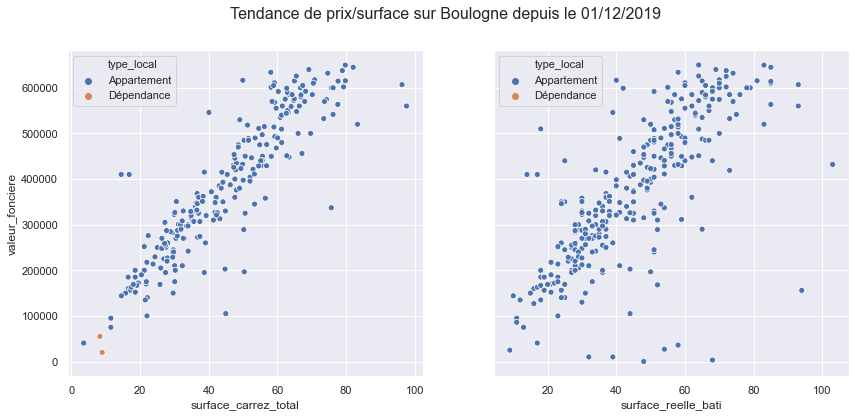

In [30]:
#compare surface carrez to bati within our range of surface / price
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14,6))
fig.suptitle("Tendance de prix/surface sur Boulogne depuis le 01/12/2019", fontsize=16)
sns.scatterplot(x=dbh.loc[(dbh['surface_carrez_total']!=0)&(dbh['surface_carrez_total']<=110)]['surface_carrez_total'], y=dbh.loc[(dbh['valeur_fonciere']!=0)&(dbh['valeur_fonciere']<=650000)]['valeur_fonciere'], hue=dbh['type_local'], ax=axes[0])
sns.scatterplot(x=dbh.loc[(dbh['surface_reelle_bati']!=0)&(dbh['surface_reelle_bati']<=110)]['surface_reelle_bati'], y=dbh.loc[(dbh['valeur_fonciere']!=0)&(dbh['valeur_fonciere']<=650000)]['valeur_fonciere'], hue=dbh['type_local'], ax=axes[1])
fig.savefig('../HousingPriceStudy_BB/figures/Tendances-Surface-Prix.png')

In [31]:
dbh['prix_m2_carrez'] = round(dbh['valeur_fonciere'] / dbh['surface_carrez_total'], 2)
dbh['prix_m2_bati'] = round(dbh['valeur_fonciere'] / dbh['surface_reelle_bati'], 2)
dbh['prix_m2_bati'] = dbh['prix_m2_bati'].replace(np.inf, np.nan)
dbh['prix_m2_carrez'] = dbh['prix_m2_carrez'].replace(np.inf, np.nan)

In [32]:
dbh.sample(10)

id_mutation date_mutation numero_disposition nature_mutation  \
13492  2019-1209941    2019-12-30                  1           Vente   
23952   2020-328979    2020-01-16                  1           Vente   
18842   2020-329051    2020-01-31                  1           Vente   
4995   2019-1209866    2019-12-18                  1           Vente   
14919   2020-328878    2020-01-08                  1           Vente   
24708  2019-1209553    2019-12-11                  1           Vente   
20731  2019-1209431    2019-12-04                  1           Vente   
14915   2020-329080    2020-01-24                  1           Vente   
3473    2020-329000    2020-01-17                  1           Vente   
25915  2019-1209826    2019-12-20                  1           Vente   

       valeur_fonciere adresse_numero adresse_suffixe     adresse_nom_voie  \
13492          86000.0          109.0            None      RUE DE BELLEVUE   
23952        2137950.0           50.0            None  BD DE LA REPUBLIQUE   
18842         632000.0           19.0            None  ALL ROBERT DOISNEAU   
4995          667570.0           37.0            None       BD JEAN JAURES   
14919         100000.0             17            None       RUE MAILLASSON   
24708         166900.0              1            None        RUE DE VANVES   
20731         256000.0              8            None           RUE D ISSY   
14915         515000.0             12            None       AV GAL LECLERC   
3473          563584.0              9            None       BD JEAN JAURES   
25915         511000.0             28            None          RUE DU FIEF   

      adresse_code_voie code_postal  ... nature_culture  \
13492              0651       92100  ...           None   
23952              8130       92100  ...           None   
18842              2575       92100  ...           None   
4995               4740       92100  ...           None   
14919              6121       92100  ...           None   
24708              9610       92100  ...           None   
20731              4660       92100  ...           None   
14915              4135       92100  ...           None   
3473               4740       92100  ...           None   
25915              3540       92100  ...           None   

      code_nature_culture_speciale nature_culture_speciale surface_terrain  \
13492                         None                    None             0.0   
23952                         None                    None             0.0   
18842                         None                    None             0.0   
4995                          None                    None             0.0   
14919                         None                    None             0.0   
24708                         None                    None             0.0   
20731                         None                    None             0.0   
14915                         None                    None             0.0   
3473                          None                    None             0.0   
25915                         None                    None             0.0   

      longitude latitude section_prefixe surface_carrez_total prix_m2_carrez  \
13492      None     None           000AL                 0.00            NaN   
23952      None     None           000BM               214.83        9951.82   
18842      None     None           000BD                74.70        8460.51   
4995       None     None           0000O                71.95        9278.25   
14919      None     None           000AP                22.05        4535.15   
24708      None     None           000BN                19.09        8742.80   
20731      None     None           000BF                 0.00            NaN   
14915      None     None           000AP                56.22        9160.44   
3473       None     None           0000L                77.65        7258.00   
25915      None     None           000BQ       

In [33]:
dbh.loc[(dbh['prix_m2_bati'].notna())&(dbh['prix_m2_carrez'].notna())].groupby(['section_prefixe']).mean()[['prix_m2_bati','prix_m2_carrez']].T

section_prefixe     0000B        0000E        0000F     0000G     0000H  \
prix_m2_bati     10833.75  9551.518182  8763.736667  10098.99  8433.565   
prix_m2_carrez    9256.32  9370.964545  8747.002222   9427.20  8516.435   

section_prefixe      0000I        0000J        0000K     0000L        0000M  \
prix_m2_bati     10977.958  9965.770000  8407.693333  9025.400  9341.945000   
prix_m2_carrez   10861.740  9830.753333  9354.780000  8881.536  9143.673333   

section_prefixe  ...      000BH    000BI        000BJ     000BK        000BL  \
prix_m2_bati     ...  8132.1775  5559.94  7127.110000  9196.110  8757.215000   
prix_m2_carrez   ...  8292.9775  5753.57  7239.083333  9466.285  8469.286875   

section_prefixe        000BM    000BN     000BO    000BP        000BQ  
prix_m2_bati     8306.473333  9272.22  7813.715  7142.86  7852.826667  
prix_m2_carrez   9189.775556  8742.80  8294.365  6605.02  7729.258333  

[2 rows x 57 columns]

lst_cl=['0000Y','0000Z','0000N','0000O','000AB','000AO','000AQ','000AR']

# Visualization around Place des Passages

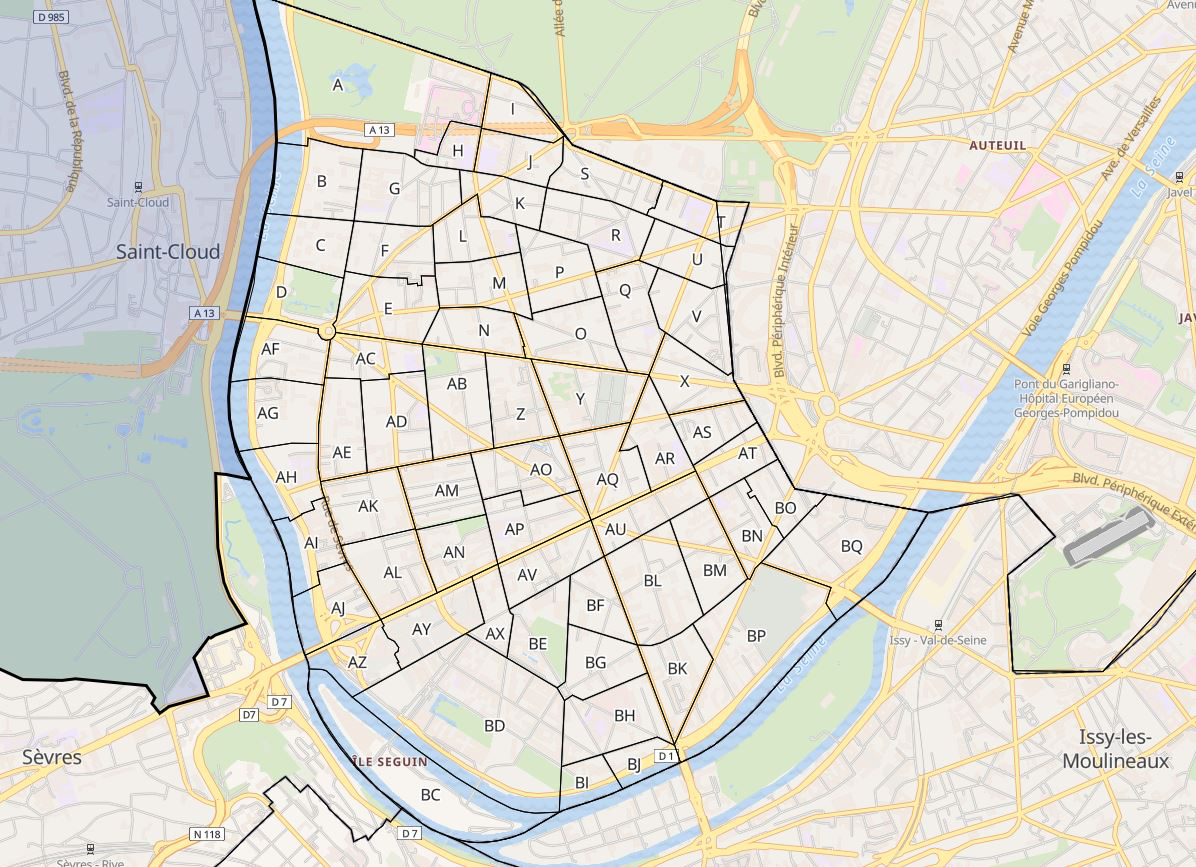

In [35]:
path="../HousingPriceStudy_BB/figures/Numéro Sections Cadastrales.jpg"
display(Image.open(path))

In [36]:
dbh.loc[(dbh['prix_m2_bati'].notna())&
        (dbh['prix_m2_carrez'].notna())&
        (dbh['section_prefixe'] == '0000Y')|
        (dbh['section_prefixe'] == '0000Z')|
        (dbh['section_prefixe'] == '0000N')|
        (dbh['section_prefixe'] == '0000O')|
        (dbh['section_prefixe'] == '000AB')|
        (dbh['section_prefixe'] == '000AO')|
        (dbh['section_prefixe'] == '000AQ')|
        (dbh['section_prefixe'] == '000AR')].groupby(['section_prefixe']).mean()[['prix_m2_bati','prix_m2_carrez']]

prix_m2_bati  prix_m2_carrez
section_prefixe                              
0000N             7866.672857     7833.000000
0000O             8467.386250     9212.051429
0000Y             9229.147778     8936.432222
0000Z            11291.654286    10919.158000
000AB             8034.341429     8417.493333
000AO            11610.823333    11868.942222
000AQ             9102.480000     8772.946000
000AR             9155.005000     9064.665000

# Visualization around Place des Passages

In [37]:
dbh['adresse_nom_voie'].unique()

array(['BD ANATOLE FRANCE', 'QUAI DU 4 SEPTEMBRE', 'RUE ANNA JACQUIN',
       'RUE DE PARIS', 'RUE DES ABONDANCES', 'RTE DE LA REINE',
       'RUE DE L ANCIENNE MAIRIE', 'AV J B CLEMENT', 'RUE DE BILLANCOURT',
       'RUE SAINT DENIS', 'RUE ESCUDIER', 'RUE DE L EGLISE',
       'RUE DE MONTMORENCY', 'RUE DU PARCHAMP', 'RUE DES MENUS',
       'AV CHARLES DE GAULLE', 'RUE DU TRANSVAAL', 'RUE GAMBETTA',
       'RUE PAU CASALS', 'RUE FESSART', 'RUE DE LA ROCHEFOUCAULD',
       'BD JEAN JAURES', 'RUE ALFRED LAURANT', "RUE D'AGUESSEAU",
       'RUE DE VERDUN', 'RUE DU CHATEAU', 'RUE DE L EST',
       'RUE LOUIS PASTEUR', 'RUE LAZARE HOCHE', 'RUE DENFERT ROCHEREAU',
       'RUE VAUTHIER', 'RUE DES TILLEULS', 'BD D AUTEUIL', 'RUE DES PINS',
       'RUE DE LA TOURELLE', 'AV ROBERT SCHUMAN', 'RUE NUNGESSER ET COLI',
       'AV FERDINAND BUISSON', 'RUE EDOUARD DETAILLE', 'RUE DE L OUEST',
       'RUE GALLIENI', 'RUE DE LA SAUSSIERE', 'AV ANDRE MORIZET',
       'RUE DE SILLY', 'RUE DE BELLEVUE', 'R

In [38]:
dbh.loc[dbh['adresse_nom_voie'] == 'BD JEAN JAURES']

id_mutation date_mutation numero_disposition nature_mutation  \
3112   2019-1209855    2019-12-27                  1           Vente   
3113   2019-1209855    2019-12-27                  1           Vente   
3114   2019-1209855    2019-12-27                  1           Vente   
3473    2020-329000    2020-01-17                  1           Vente   
3475    2020-328943    2020-01-10                  1           Vente   
3478   2019-1209881    2019-12-27                  1           Vente   
3480   2019-1209819    2019-12-20                  1           Vente   
4610    2020-328974    2020-01-16                  1           Vente   
4614   2019-1209893    2019-12-26                  1           Vente   
4987    2020-329225    2020-02-21                  1           Vente   
4994   2019-1209833    2019-12-23                  1           Vente   
4995   2019-1209866    2019-12-18                  1           Vente   
8939    2020-329175    2020-02-07                  1           Vente   
8941    2020-329199    2020-02-06                  1           Vente   
8942    2020-329099    2020-02-05                  1           Vente   
9519    2020-329036    2020-02-03                  1           Vente   
15351   2020-328721    2020-01-08                  1           Vente   
21718   2020-329141    2020-02-07                  1           Vente   
21720   2020-329188    2020-02-06                  1           Vente   
23186   2020-329270    2020-02-07                  1           Vente   
23192   2020-328983    2020-01-27                  1           Vente   
23200  2019-1209852    2019-12-19                  1           Vente   

       valeur_fonciere adresse_numero adresse_suffixe adresse_nom_voie  \
3112          440000.0              3               B   BD JEAN JAURES   
3113          440000.0              3               B   BD JEAN JAURES   
3114          440000.0              3               B   BD JEAN JAURES   
3473          563584.0              9            None   BD JEAN JAURES   
3475          614685.0              9            None   BD JEAN JAURES   
3478          325000.0              6            None   BD JEAN JAURES   
3480          775000.0              9            None   BD JEAN JAURES   
4610            3300.0             68            None   BD JEAN JAURES   
4614         1296100.0             60            None   BD JEAN JAURES   
4987          410000.0           57.0            None   BD JEAN JAURES   
4994          514000.0           37.0            None   BD JEAN JAURES   
4995          667570.0           37.0            None   BD JEAN JAURES   
8939          605000.0            101            None   BD JEAN JAURES   
8941          591800.0            121            None   BD JEAN JAURES   
8942          703000.0            101            None   BD JEAN JAURES   
9519          546500.0             92            None   BD JEAN JAURES   
15351         290000.0            175               Q   BD JEAN JAURES   
21718         326000.0          274.0            None   BD JEAN JAURES   
21720         321000.0          264.0               B   BD JEAN JAURES   
23186         599050.0          229.0            None   BD JEAN JAURES   
23192         480000.0          231.0            None   BD JEAN JAURES   
23200         544200.0          229.0            None   BD JEAN JAURES   

      adresse_code_voie code_postal  ... nature_culture  \
3112               4740       92100  ...           None   
3113               4740       92100  ...           None   
3114               4740       92100  ...           None   
3473               4740       92100  ...           None   
3475               4740       92100  ...           None   
3478               4740       92100  ...           None   
3480               4740       92100  ...           None   
4610               4740       92100  ...           None   
4614               4740       92100  ...           None   
4987               4740       92100  ...           None   

In [39]:
dbh.loc[(dbh['prix_m2_bati'].notna())&
        (dbh['prix_m2_carrez'].notna())&
        (dbh['adresse_nom_voie'] == 'BD JEAN JAURES')].groupby(['section_prefixe']).mean()[['prix_m2_bati','prix_m2_carrez']]

prix_m2_bati  prix_m2_carrez
section_prefixe                              
0000L             6930.995000     7584.500000
0000O             9081.663333     9004.183333
0000Y            10233.356667     9682.686667
0000Z             8674.600000     8647.150000
000BH             7717.045000     7624.210000
000BL            10300.400000     8688.186667